# Lasso regression
Unit 3 / Lesson 3 / Project 3

### Regularization parameter: Lasso

The $\lambda$ for lasso can var between 0 (no penalty, acts like OLS) and infinity.
If $\lambda$ is too large, all parameters will be set to zero.  

Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression.
Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same $R^2$ for a given lambda value?

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
PATH = (
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
)
df = pd.read_csv(PATH).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns

df = pd.DataFrame(preprocessing.scale(df), columns=names)

df.head()

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  del sys.path[0]


,default,student,balance,income
0,-0.185599,-0.645936,-0.218835,0.813187
1,-0.185599,1.548141,-0.037616,-1.605496
2,-0.185599,-0.645936,0.492410,-0.131212
3,-0.185599,-0.645936,-0.632893,0.164031
4,-0.185599,-0.645936,-0.102791,0.370915


In [3]:
# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df['balance_student'] = df['balance'] * df['student']
df['balance_default'] = df['balance'] * df['default']
df['student_default'] = df['student'] * df['default']
df['balance_sqrt'] = (df['balance'] + 100) ** .5
df['balance2'] = (df['balance'] + 100) ** 2
df['balance3'] = (df['balance'] + 100) ** 3

In [4]:
data = df.drop('income', axis=1)
target = df['income'].values.reshape(-1, 1)

# define training and test sets
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

### Lasso Regression

In [5]:
# Large number of parameters.
lassBig = linear_model.Lasso(alpha=0.35)
lassBig.fit(X_train2, y_train)

# display
print('Lasso Regression')
print('\nR-squared training set:')
print(lassBig.score(X_train2, y_train))

#Store the parameter estimates.
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates:')
print(origparams)

print('\nR-squared test set:')
print(lassBig.score(X_test2, y_test))

print('\nLasso regression alpha:')
print(0.35)

Lasso Regression

R-squared training set:
0.4400004133896048

Parameter estimates:
[ 0.00000000e+00 -3.91644295e-01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.90781412e-04
 -3.92905742e-07  3.29798096e+00]

R-squared test set:
0.4523526358116947

Lasso regression alpha:
0.35


Our Lasso Regression from the lesson doesn't produce a very accurate model.
Let's see how a Ridge Regression performs with the same $\lambda$ value.

### Ridge Regression

In [6]:
# instantiate ridge regression
ridge = linear_model.Ridge(alpha=0.35)
ridge.fit(X_train2, y_train)

# display
print('Ridge Regression')
print('\nR-squared training set:')
print(ridge.score(X_train2, y_train))

#Store the parameter estimates.
origparams = np.append(ridge.coef_, ridge.intercept_)
print('\nParameter estimates:')
print(origparams)

print('\nR-squared test set:')
print(ridge.score(X_test2, y_test))

print('\nRidge regression alpha:')
print(0.35)

Ridge Regression

R-squared training set:
0.566081589857317

Parameter estimates:
[-1.66229497e-02 -7.52831671e-01  2.38603196e-03 -6.99793441e-03
  1.34188235e-02 -4.52119900e-03  2.22737103e-04 -4.82511581e-03
  3.20499533e-05  1.61893558e+01]

R-squared test set:
0.5789894517557608

Ridge regression alpha:
0.35


Our Ridge Regression doesn't perform much better.
Let's see if we can plot our $R^2$ values for a range of $\lambda$ values.
We can use that plot to determine what the optimal $\lambda$ value is.

### Plotting Lambda

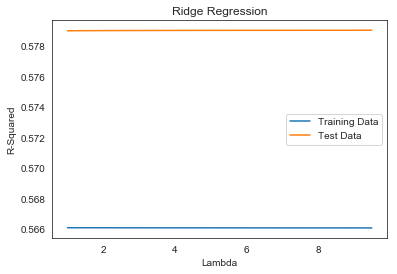

In [7]:
# define empty list
alphas = []
train_scores = []
test_scores = []

#Run the model for many alphas.
for lambd in np.arange(1,10,.5):
    ridge = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridge.fit(X_train2, y_train)
    alphas.append(lambd)
    train_scores.append(ridge.score(X_train2, y_train))
    test_scores.append(ridge.score(X_test2, y_test))

plt.plot(alphas, train_scores, label='Training Data')
plt.plot(alphas, test_scores, label='Test Data')
plt.title('Ridge Regression')
plt.xlabel('Lambda')
plt.ylabel('R-Squared')
plt.legend()
plt.show();

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\skle

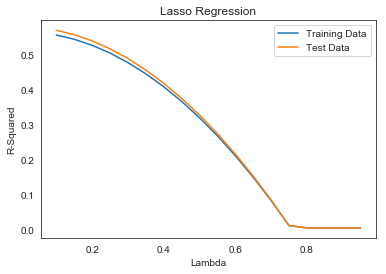

In [8]:
# define empty list
alphas = []
train_scores = []
test_scores = []

#Run the model for many alphas.
for lambd in np.arange(0.1,1,.05):
    lass = linear_model.Lasso(alpha=lambd, fit_intercept=False)
    lass.fit(X_train2, y_train)
    alphas.append(lambd)
    train_scores.append(lass.score(X_train2, y_train))
    test_scores.append(lass.score(X_test2, y_test))

plt.plot(alphas, train_scores, label='Training Data')
plt.plot(alphas, test_scores, label='Test Data')
plt.title('Lasso Regression')
plt.xlabel('Lambda')
plt.ylabel('R-Squared')
plt.legend()
plt.show();

Our plot of $\lambda$ values wasn't very helpful for our Ridge Regression, but we were able to see a clear range of $R^2$ values for our plot of $\lambda$ values for our Lasso Regression.

Let's see if we can use sklearn's `RidgeCV` and `LassoCV` functions to optimize our $\lambda$ values across a range.

### Optimizing Lambda

In [9]:
# instantiate a RidgeCV regression
alpha_list = np.arange(1,10,.5)
ridgeCV = linear_model.RidgeCV(alphas=alpha_list, cv=5)
ridgeCVfit = ridgeCV.fit(X_train2, y_train)

# Display
print('Ridge Regression')
print('\nR-squared training set:')
print(ridgeCV.score(X_train2, y_train))

origparams = np.append(ridgeCVfit.coef_, ridgeCVfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

print('\nR-squared test set:')
print(ridgeCV.score(X_test2, y_test))

print('\nLasso regression alpha:')
print(ridgeCV.alpha_)

Ridge Regression

R-squared training set:
0.5660813984633055

Parameter estimates for the model with few features:
[-1.64903052e-02 -7.52412770e-01  1.41928367e-04 -7.07630806e-03
  1.33556884e-02 -4.49430430e-03  1.46207767e-05 -4.82160917e-03
  3.20985657e-05  1.61077750e+01]

R-squared test set:
0.5789893221604103

Lasso regression alpha:
4.5


In [10]:
# instantiate a lassoCV regression
alpha_list = np.arange(0.1,1,.05)
lassCV = linear_model.LassoCV(alphas=alpha_list, cv=5)
lassCVfit = lassCV.fit(X_train2, y_train)

# Display
print('Lasso Regression')
print('\nR-squared training set:')
print(lassCV.score(X_train2, y_train))

origparams = np.append(lassCVfit.coef_, lassCVfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

print('\nR-squared test set:')
print(lassCV.score(X_test2, y_test))

print('\nLasso regression alpha:')
print(lassCV.alpha_)

Lasso Regression

R-squared training set:
0.5555356613748204

Parameter estimates for the model with few features:
[ 0.00000000e+00 -6.50679452e-01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -8.53425773e-05
 -5.81508829e-08  9.09573538e-01]

R-squared test set:
0.5691419853003806

Lasso regression alpha:
0.1


C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We can use that our Ridge Regression and Lasso Regression have very different optimal $\lambda$ values.